In [1]:
from hamilton import driver, dataflows

# 1. Install from PyPI
Install the package from PyPI with `!pip install sf-hamilton-contrib`.
Then see run.py for details. 

In [ ]:
# !pip install sf-hamilton-contrib

# 2. Dynamic installation
Install the package dynamically with without installing/upgrading sf-hamilton-contrib.

In [2]:
xgboost_optuna = dataflows.import_module("xgboost_optuna", "zilto")

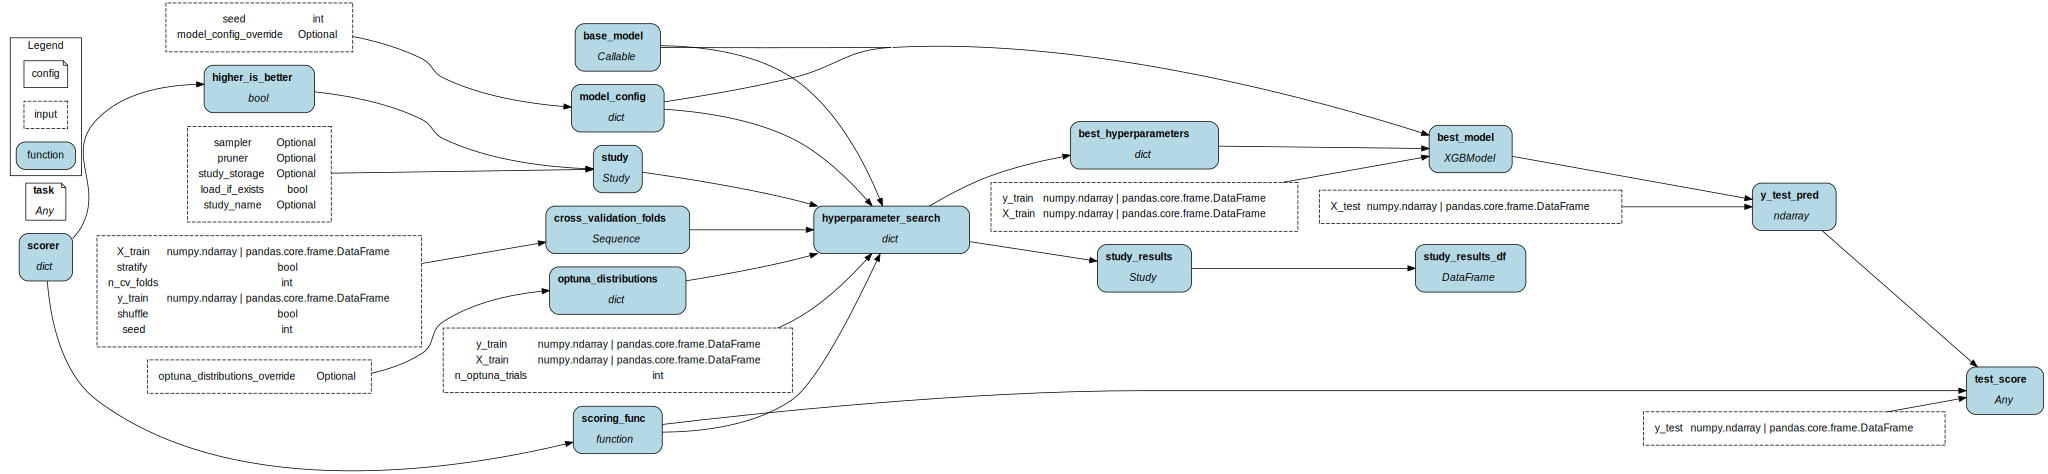

In [4]:
dr = (
    driver.Builder()
    .with_modules(xgboost_optuna)
    .with_config(dict(task="classification"))
    .build()
)

dr.display_all_functions()

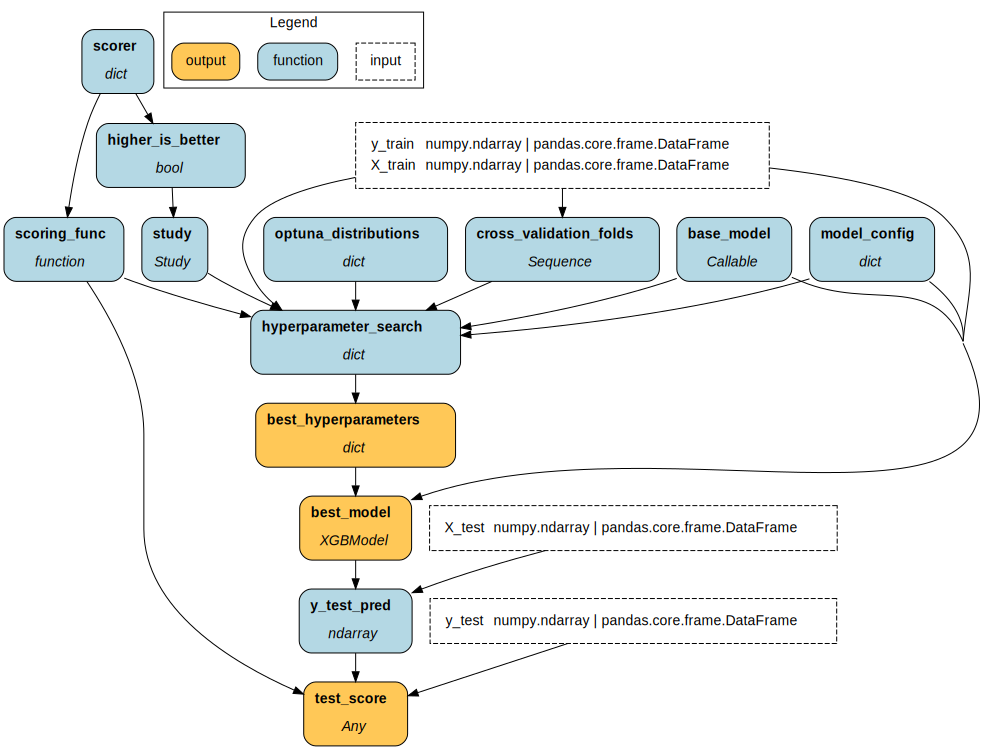

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Boston Housing dataset (regression example)
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

inputs = dict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
)

final_vars = ["best_model", "best_hyperparameters", "test_score"]

dr.visualize_execution(
    final_vars=final_vars,
    inputs=inputs,
    output_file_path=None,
    orient="TB",
    deduplicate_inputs=True,
)

In [6]:
dr.execute(
    final_vars=final_vars,
    inputs=inputs,
)

[I 2023-11-15 18:40:48,705] A new study created in memory with name: no-name-7bf4dece-e402-4b38-9818-9c564d2d68b2


{'best_model': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.5256259560017136, device='cpu',
               early_stopping_rounds=None, enable_categorical=True,
               eval_metric=None, feature_types=None, gamma=0.11302140972445468,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.032344180499316345,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=9, max_depth=4, max_leaves=None,
               min_child_weight=3, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=550, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'best_hyperparameters': {'n_estimators': 550,
  'learning_rate': 0.032344180499316345,
  'max_depth': 4,
  'gamma': 0.11302140972445468,
  'colsample_bytree': 0.

# 3. Local copy

In [7]:
# do 2. Dynamic installation
xgboost_optuna = dataflows.import_module("xgboost_optuna", "zilto")

In [10]:
# then create local copy
dataflows.copy(xgboost_optuna, destination_path="./my_copy")

In [11]:
# import your local copy
from my_copy import xgboost_optuna

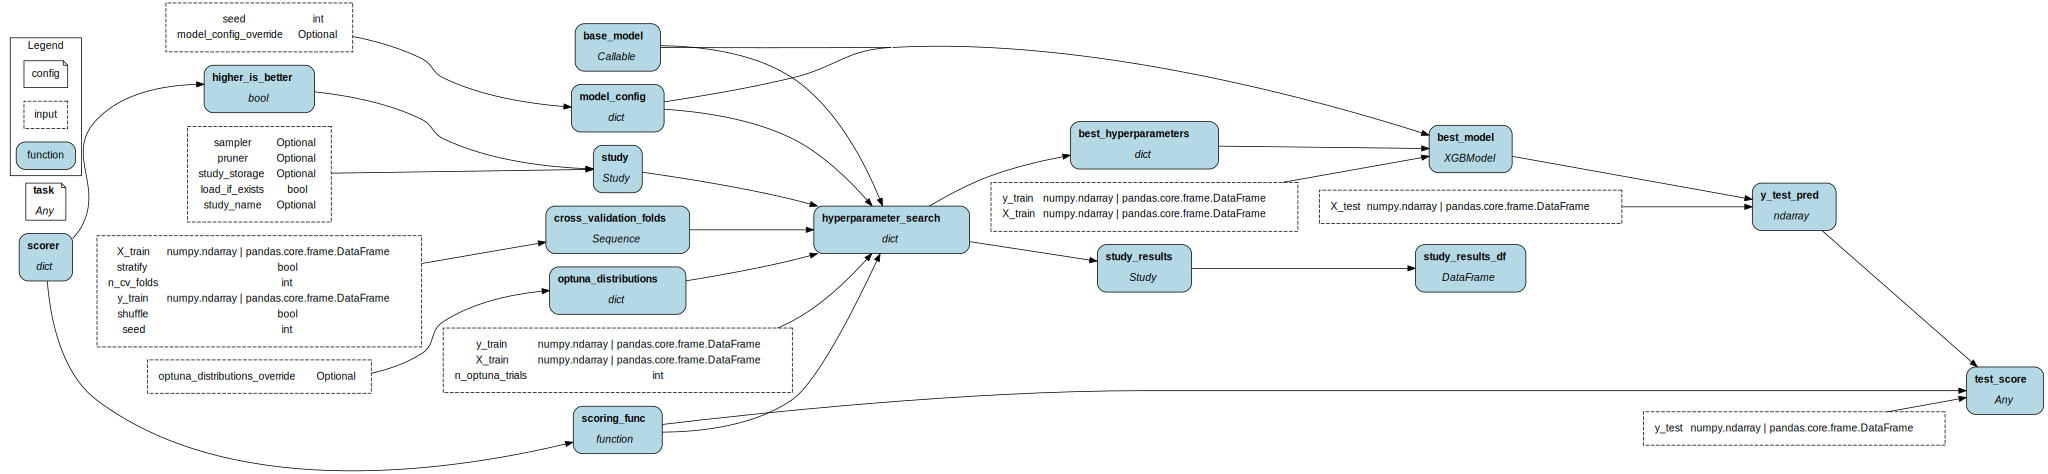

In [13]:
dr = (
    driver.Builder()
    .with_modules(xgboost_optuna)
    .with_config(dict(task="classification"))
    .build()
)

dr.display_all_functions()